<a href="https://colab.research.google.com/github/sanda-avram/BERT/blob/main/FillMask/ROST_FillMask_Twitter_twhin_bert_large.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

In [53]:
from datasets import Dataset
import pandas as pd
train_df=messages = pd.read_csv('trainSet1.csv', sep=',', names=["label", "text"])
test_df=messages = pd.read_csv('testSet1.csv', sep=',', names=["label", "text"])


train_ds = Dataset.from_pandas(train_df, split="train")
test_ds = Dataset.from_pandas(test_df, split="test")

model_name = "Twitter/twhin-bert-large"

In [ ]:
!pip install transformers

In [54]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(model_name)

loading file sentencepiece.bpe.model from cache at None
loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--Twitter--twhin-bert-large/snapshots/3994dc8196bd4cce6f83bbdffeeb28fd27f52346/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--Twitter--twhin-bert-large/snapshots/3994dc8196bd4cce6f83bbdffeeb28fd27f52346/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--Twitter--twhin-bert-large/snapshots/3994dc8196bd4cce6f83bbdffeeb28fd27f52346/tokenizer_config.json


In [55]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=256)

train_dataset = train_ds.map(tokenize_function, batched=True)
test_dataset = test_ds.map(tokenize_function, batched=True)

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [56]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=10)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Twitter--twhin-bert-large/snapshots/3994dc8196bd4cce6f83bbdffeeb28fd27f52346/config.json
Model config BertConfig {
  "_name_or_path": "Twitter/twhin-bert-large",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type":

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--Twitter--twhin-bert-large/snapshots/3994dc8196bd4cce6f83bbdffeeb28fd27f52346/pytorch_model.bin
Some weights of the model checkpoint at Twitter/twhin-bert-large were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSeque

In [ ]:
!pip install evaluate


In [57]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="testTrainer", evaluation_strategy="epoch")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [58]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

In [59]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 5411
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2031
  Number of trainable parameters = 561470986


Epoch,Training Loss,Validation Loss,Accuracy
1,2.118900,2.200487,0.215341
2,2.062100,2.162816,0.215341
3,2.072300,2.136220,0.215341


Saving model checkpoint to testTrainer/checkpoint-500
Configuration saved in testTrainer/checkpoint-500/config.json
Model weights saved in testTrainer/checkpoint-500/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1421
  Batch size = 8
Saving model checkpoint to testTrainer/checkpoint-1000
Configuration saved in testTrainer/checkpoint-1000/config.json
Model weights saved in testTrainer/checkpoint-1000/pytorch_model.bin
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num exampl

TrainOutput(global_step=2031, training_loss=2.0814528397184944, metrics={'train_runtime': 835.0433, 'train_samples_per_second': 19.44, 'train_steps_per_second': 2.432, 'total_flos': 7564225368333312.0, 'train_loss': 2.0814528397184944, 'epoch': 3.0})

In [60]:
trainer.evaluate(trainer.eval_dataset)

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1421
  Batch size = 8


{'eval_loss': 2.1362204551696777,
 'eval_accuracy': 0.21534130893736805,
 'eval_runtime': 18.0837,
 'eval_samples_per_second': 78.579,
 'eval_steps_per_second': 9.843,
 'epoch': 3.0}

In [61]:
predicted=trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1421
  Batch size = 8


In [63]:
c=0
y=[]
for v in predicted.predictions:
  c+=1

  max = v[0]
  index = 0
  for i in range(1,len(v)):
    if v[i] > max:
      max = v[i]
      index = i
  y.append(index)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm=confusion_matrix(test_dataset['label'], y)
print(cm)
accuracy = accuracy_score(test_dataset['label'], y)
print("accuracy:", accuracy)
# Calculate macro-accuracy
#macro_accuracy = np.mean(np.diag(cm))

#print("Macro-accuracy:", macro_accuracy/10)
from sklearn.metrics import classification_report

print(classification_report(test_dataset['label'], y, digits=3))

[[  0   0   0   0   0   0   0   0   0  74]
 [  0   0   0   0   0   0   0   0   0 216]
 [  0   0   0   0   0   0   0   0   0 242]
 [  0   0   0   0   0   0   0   0   0  86]
 [  0   0   0   0   0   0   0   0   0  34]
 [  0   0   0   0   0   0   0   0   0 185]
 [  0   0   0   0   0   0   0   0   0  25]
 [  0   0   0   0   0   0   0   0   0  77]
 [  0   0   0   0   0   0   0   0   0 176]
 [  0   0   0   0   0   0   0   0   0 306]]
accuracy: 0.21534130893736805
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        74
           1      0.000     0.000     0.000       216
           2      0.000     0.000     0.000       242
           3      0.000     0.000     0.000        86
           4      0.000     0.000     0.000        34
           5      0.000     0.000     0.000       185
           6      0.000     0.000     0.000        25
           7      0.000     0.000     0.000        77
           8      0.000     0.000     0.000       17

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(test_dataset['label'], y)

0.1

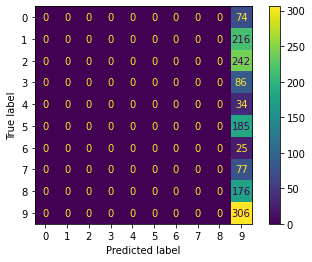

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
 

In [ ]:
!kill 7123
%reload_ext tensorboard
%tensorboard --logdir ./testTrainer/
